### overall skam  Preview the raw data

In [1]:
import glob
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import os
import datetime
import matplotlib
import logging
import csv

# logging.basicConfig(filename='output.log' , level= logging.DEBUG)
# print = logging.debug

def skam(flist , M = 200 , sample_second_space = 15 , sample_fre = 1000 ,  start = 0 , span = 20):
    datalist = []
    timestring = []     
    re_sample_fre = sample_fre // M

    for fname in flist[ start : start + span ]:
        utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
        timestring.append(utc_datetime.time())
        utc_day = utc_datetime.strftime("%Y/%m/%d")

        data = dp.read_das(fname ,ch1=820, ch2=900)
        # raw_clim = max( data.std() / 10 , raw_clim)
        datalist.append(data)

    data = np.concatenate(datalist, axis = 1)
    if M > 1 :
        data = signal.decimate(data, M, axis = 1)

    # data.shape (#channle , re_sample_fre * sample_second_space * span)
    step_per_file = re_sample_fre * sample_second_space
    step_this_span = (span+1) * step_per_file 
    timeindex = range(0 , step_this_span ,step_per_file)
    timestring.append((utc_datetime + datetime.timedelta(seconds=+15)).time())
    return data , timestring , timeindex , utc_day

def cal_std(flist , csv_writer,  M = 200 , sample_second_space = 15 , sample_fre = 1000 ,  start = 0 , span = 20):
 
    datalist = []
    timestring = [] 
    std  = []
    re_sample_fre = sample_fre // M

    print("std of "+str(sample_second_space * span) + "seconds")

    if span > 1:
        for fname in flist[ start : start + span ]:
            utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
            timestring.append(utc_datetime.time())         
            data = dp.read_das(fname,ch1=820,ch2=900)
            datalist.append(data)
        data = np.concatenate(datalist, axis = 1)
        data = signal.decimate(data, M, axis = 1)

        std.append(data.std())
    if span < 1:
        fname = flist[start]
        data = dp.read_das(fname,ch1=820,ch2=900)
        data = signal.decimate(data, M, axis = 1)

        utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
        timedelta = sample_second_space*span
        step_per_file = re_sample_fre * sample_second_space
        step_std_span = span * step_per_file 
        for i in range(0 ,  int(1/span)):
            std_i = data[ : , int( i * step_std_span): int ((i+1)* step_std_span )].std()
            std.append(std_i)
            utc_datetime = utc_datetime + datetime.timedelta(seconds=timedelta)
            timestring.append(utc_datetime.time().strftime("%H:%M:%S.%f")[:-3])         
            csv_writer.writerow([str(utc_datetime.time().strftime("%H:%M:%S.%f")[:-3])+" " , str(std_i) ])
    return timestring , std



def plot_timeticks(data , timestring , timeindex , clim_rate = 10 ,title = "Figue.png") :
    plt.figure(figsize=[16,18])
    plt.title(title)

    clim= data.std() 
    d_clim = data.std() / clim_rate
    # norm = matplotlib.colors.Normalize(vmin=-clim, vmax=+clim)

    print(clim)
    plt.xticks(timeindex,timestring,rotation = 20, ha = 'right')
    # plt.yticks(range(0,80,10),range(820,900,10))
    plt.imshow(data, aspect='auto', cmap='RdBu', vmin=-d_clim, vmax=d_clim )
    # plt.imshow(data, aspect='auto', cmap='RdBu', norm=norm )
    plt.xlabel("clim / " + str(clim))
    plt.colorbar()
    # plt.show()
    
    

/home/kiwicat/miniconda3/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

flist = glob.glob('../../czyc/test3/*.h5')
flist.sort()
test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_064027.357.h5')[0][0] #5806 
print(len(flist),test1_file_num)


9750 4008


skam speed： 1s /file

hammer signal at （datetime，file num，span，channle ，clim rate ）
20240104_065327（4061 , 3 , 890 , 1）

20240104_070442 (4105 , 3 , 830 , 1)

锤击点3_file = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_070442.357.h5')[0][0]  #4105

锤击点2_file = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_065342.357.h5')[0][0]  #4061

noise record at 

test 1 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_060927.357.h5')[0][0] #3885

test 2 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_064027.357.h5')[0][0] #3885

test 3 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_072227.357.h5')[0][0] #3885

test 4: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_180327.357.h5')[0][0] 

test 5: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_191327.357.h5')[0][0] 



cal std per 0.2 second

In [3]:

# span_each_pic = 1 / 75
# decimate_rate = 1
# with open('example.csv', 'w' , encoding= 'utf-8',newline="") as f:
#     csv_writer = csv.writer(f)
#     for n in range(0,140):
#         timestring ,std = cal_std(flist , csv_writer,M=decimate_rate, start= test1_file_num + n ,span= span_each_pic)


skam for 4 min 

有几点改进的地方，尽快修改一下：1.PSD的横纵轴要统一，das数据和噪声分别以统一的尺度画图；2.把两组数据对比，要在同一个频段下，考虑0-200 Hz；3. 每张图要标好注释，注明是用的哪个数据画的

Folder already exists


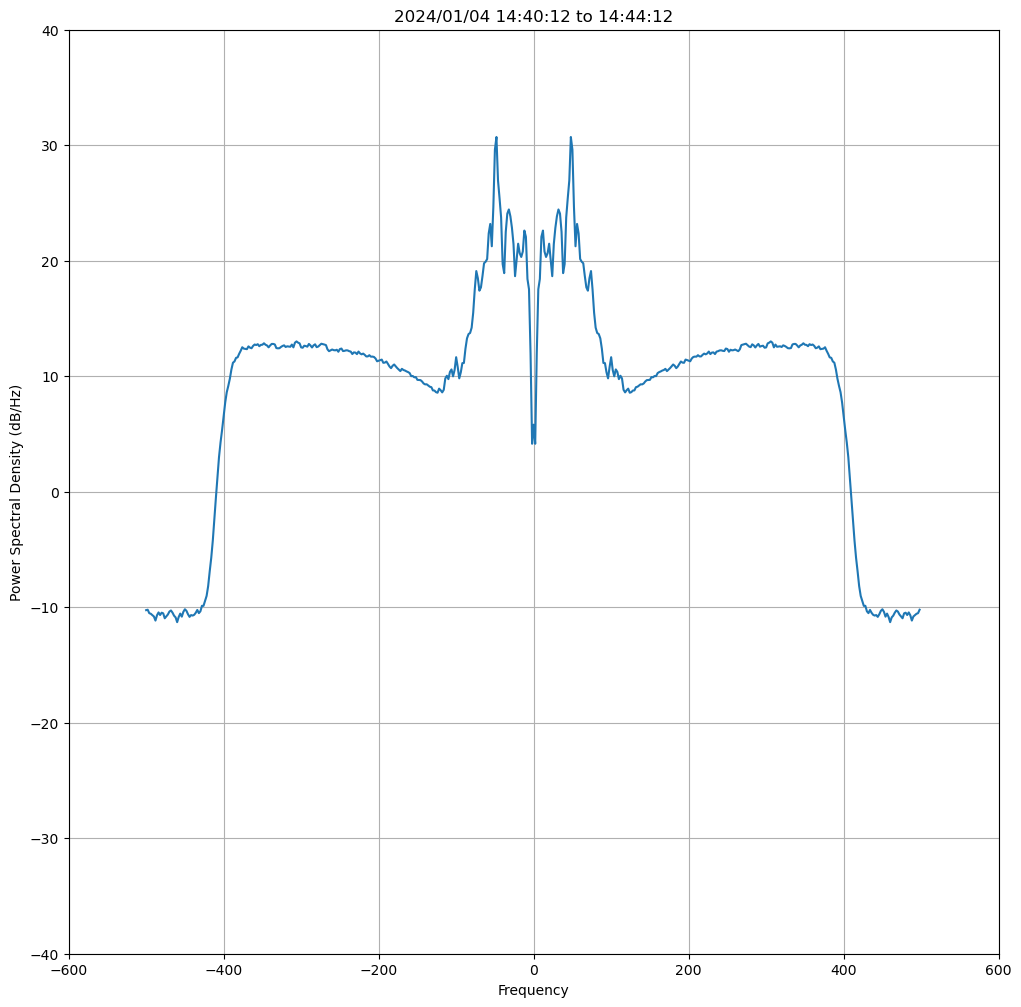

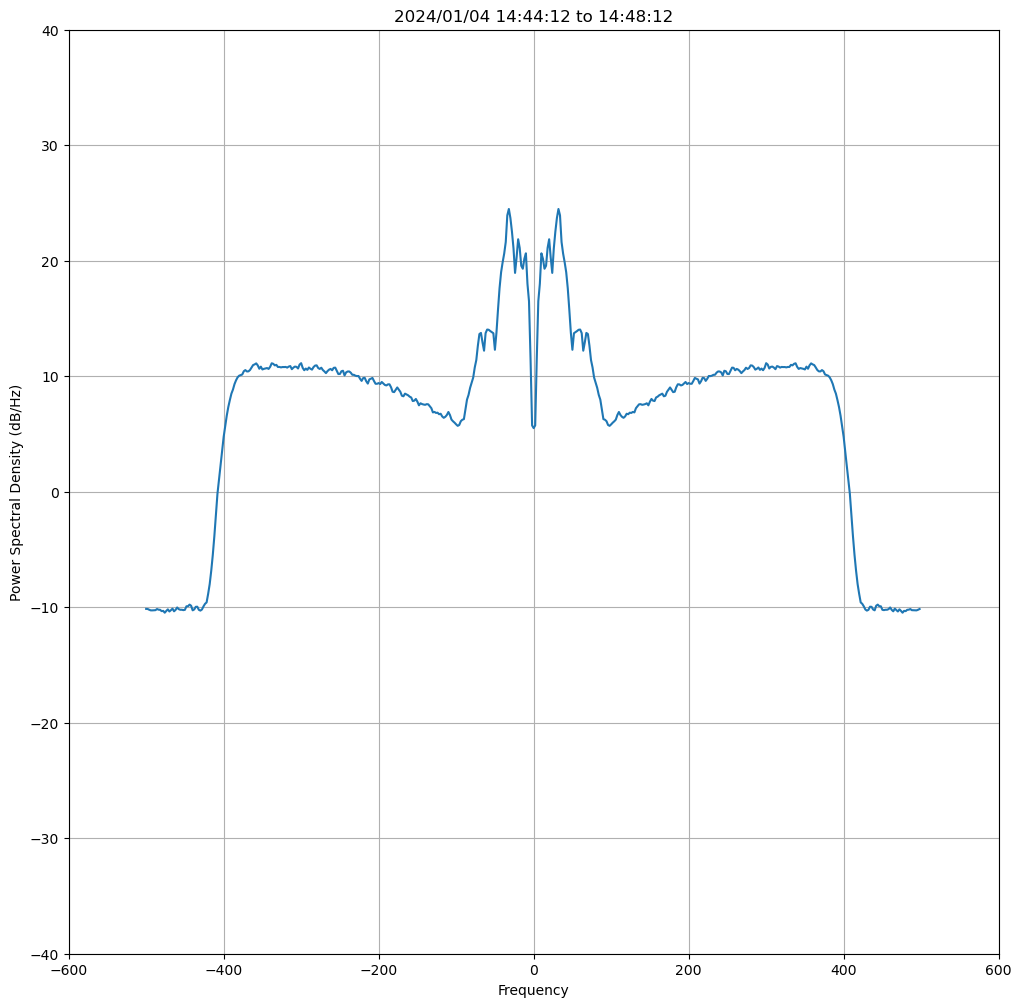

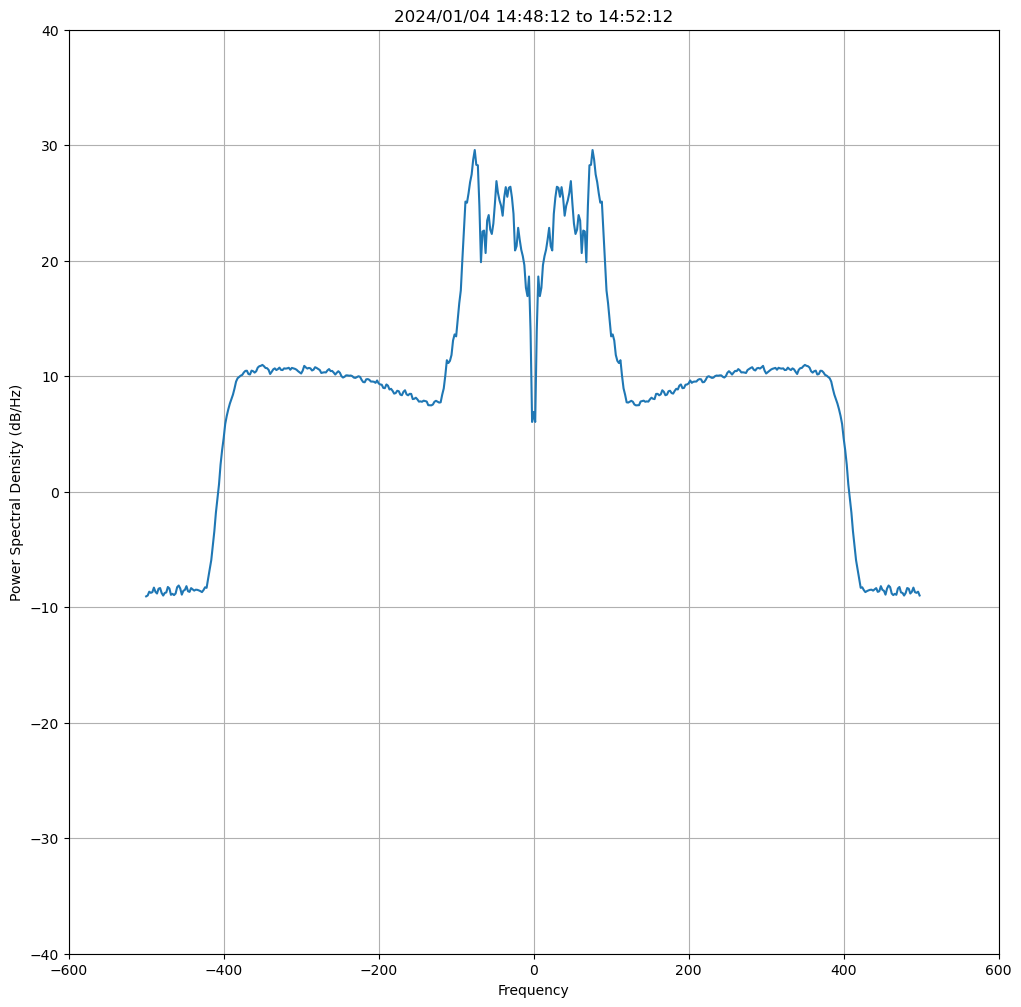

OSError: [Errno 5] Can't synchronously read data (file read failed: time = Fri Apr 19 19:57:00 2024
, filename = '../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_065257.357.h5', file descriptor = 68, errno = 5, error message = 'Input/output error', buf = 0x3b40488, total read size = 523968, bytes this sub-read = 523968, bytes actually read = 18446744073709551615, offset = 0)

In [4]:
# %matplotlib ipympl
%matplotlib inline

path = '../output/test2_psd_v2/'

if not os.path.exists(path):
    os.makedirs(path)
    print("Folder created")
else:
    print("Folder already exists")

span_each_pic = 16
decimate_rate = 1
[Pxx0,f0] = [0,0]
for n in range(0,8):
    data , timestring , timeindex ,utc_day = skam(flist ,M=decimate_rate, start= test1_file_num + span_each_pic * n - 1,span= span_each_pic)
    data1 = dp.das_preprocess(data)
    data2 = dp.tapering(data1, 0.2)
    data2 = dp.lowpass(data2, 0.001, fh=400)
    data2 = dp.das_preprocess(data2)
    nfft = 500

    x = data2[60,:]
    fs = 1000
    plt.figure(figsize=(12,12))
    plt.axis([-600,600,-40,40])
    plt.title(str(utc_day)+" "+str(timestring[0])+" to "+str(timestring[-1]))

    [Pxx1,f1] = plt.psd(x,                       # 随机信号
                    NFFT=nfft,               # 每个窗的长度
                    Fs=fs,                   # 采样频率
                    detrend='mean',          # 去掉均值
                    window=np.hanning(nfft), # 加汉尼窗
                    noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                    sides='twosided')        # 求双边谱
    
    Pxx0 += Pxx1
    plt.savefig(path+'/Figure '+str(n+1)+'_ch880_lp400.png')
    plt.show()
    plt.close

    # plt.figure()
    # plt.plot(f1,Pxx0)
    # plt.yscale("log")
    # plt.show()
# plt.savefig(path+'/ch_880_psd_overlap.png')

In [ ]:
# # %matplotlib ipympl
# %matplotlib inline

# path = '../output/test1_skam/'

# if not os.path.exists(path):
#     os.makedirs(path)
#     print("Folder created")
# else:
#     print("Folder already exists")

# span_each_pic = 12
# decimate_rate = 200
# for n in range(0,10):
#     data , timestring , timeindex = skam(flist ,M=decimate_rate, start= test1_file_num + span_each_pic * n - 1,span= span_each_pic)
#     data =  dp.das_preprocess(data)
#     plot_timeticks(data,timestring ,timeindex ,clim_rate=20 ,title ="M="+str(decimate_rate)+",date:20240105" )
    
#     plt.savefig(path+'/Figure '+str(n+1)+'all10_clim_rate_20.png')
#     plt.close

one channle 

In [ ]:

# ch=830
# start_time = 0
# pic_name = 'M='+str(decimate_rate)+' ,channel'+str(ch)
# plt.figure(figsize=[20,12])
# plt.xticks(timeindex[0:span_each_pic-start_time],timestring[start_time:],rotation = 60, ha = 'right')
# plt.plot(data[ch,start_time*75:])
# plt.title(pic_name)
# # plt.savefig(path+str(n+1)+'.png')


noise overview 

Folder already exists


/tmp/ipykernel_12812/912104714.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32421888 44100


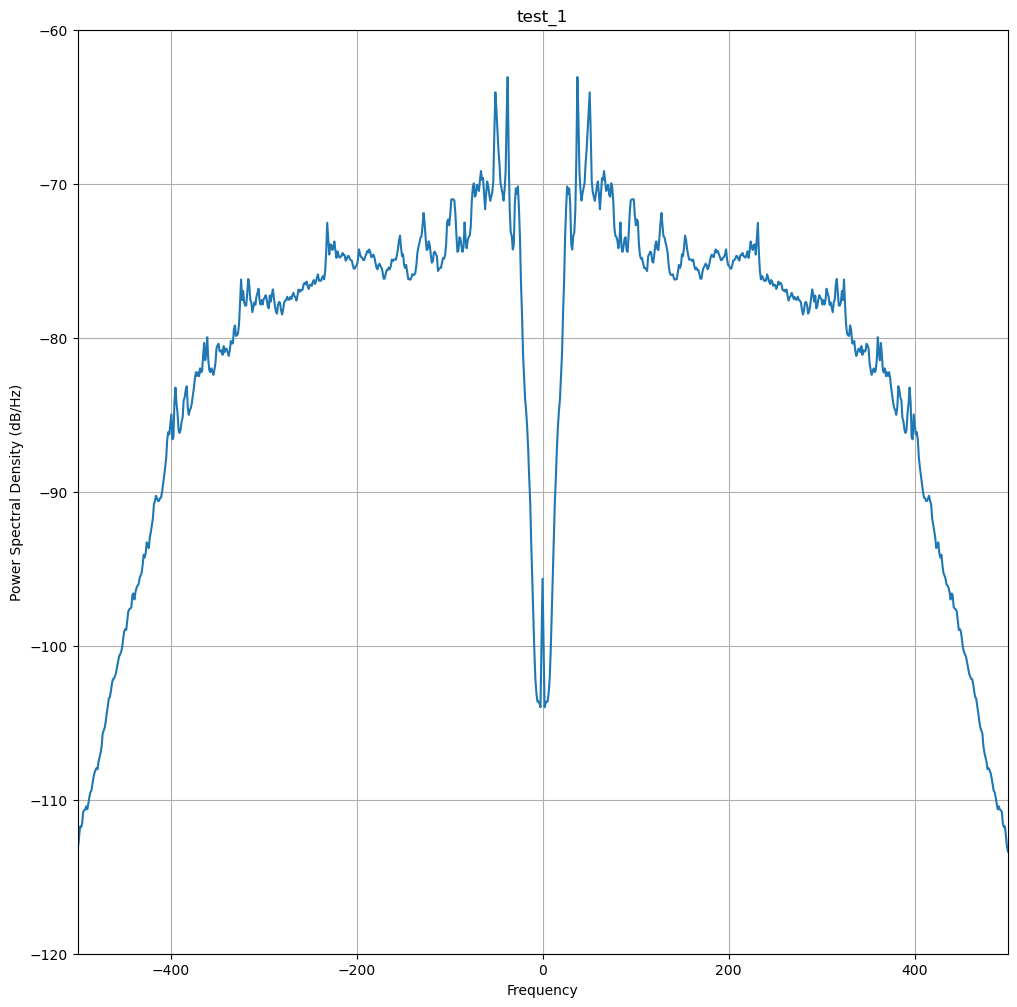

/tmp/ipykernel_12812/912104714.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32421888 44100


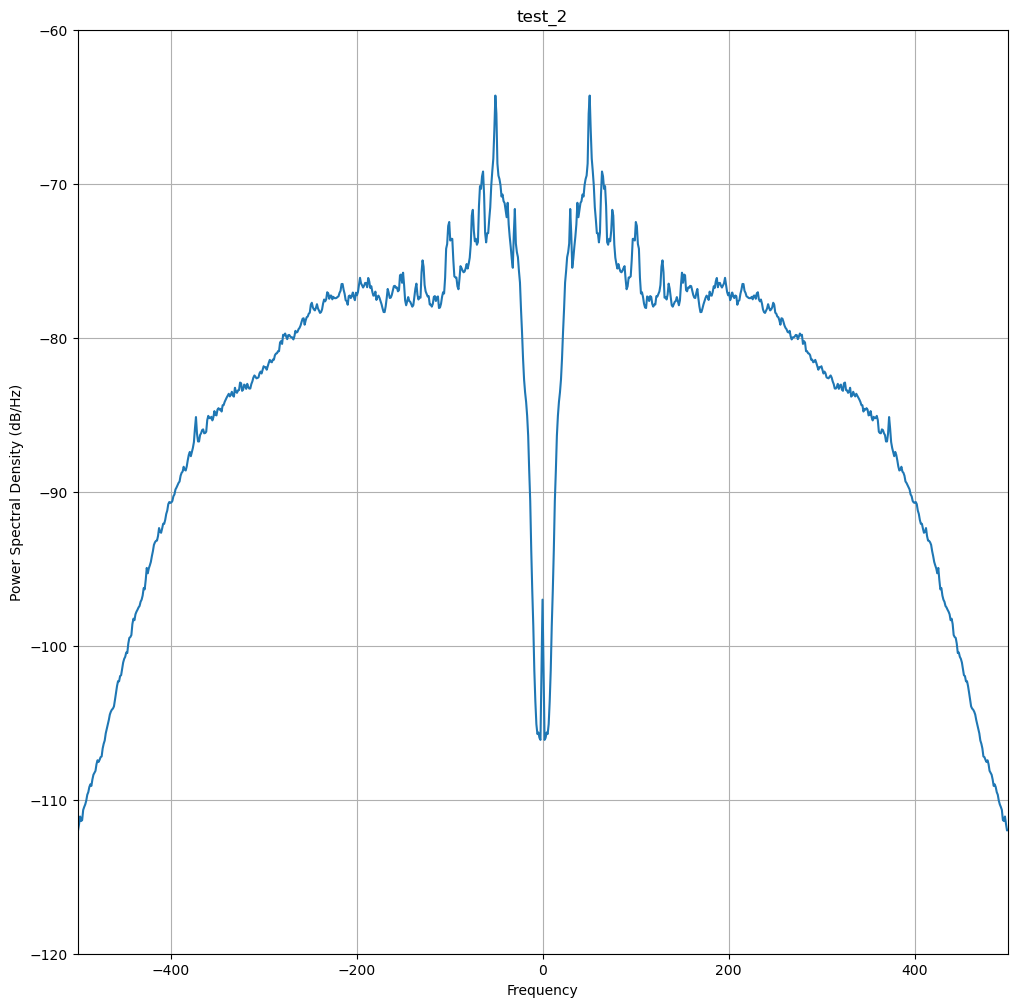

/tmp/ipykernel_12812/912104714.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32421888 44100


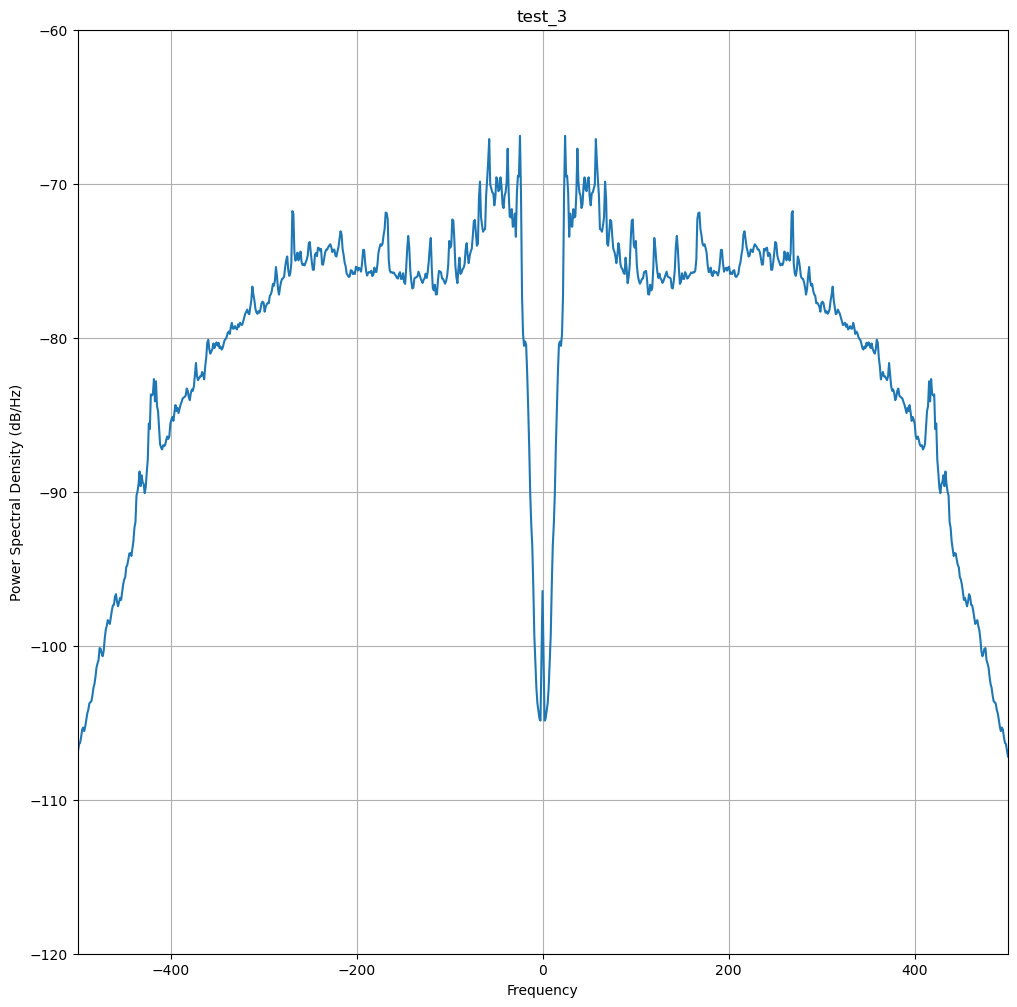

/tmp/ipykernel_12812/912104714.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32421888 44100


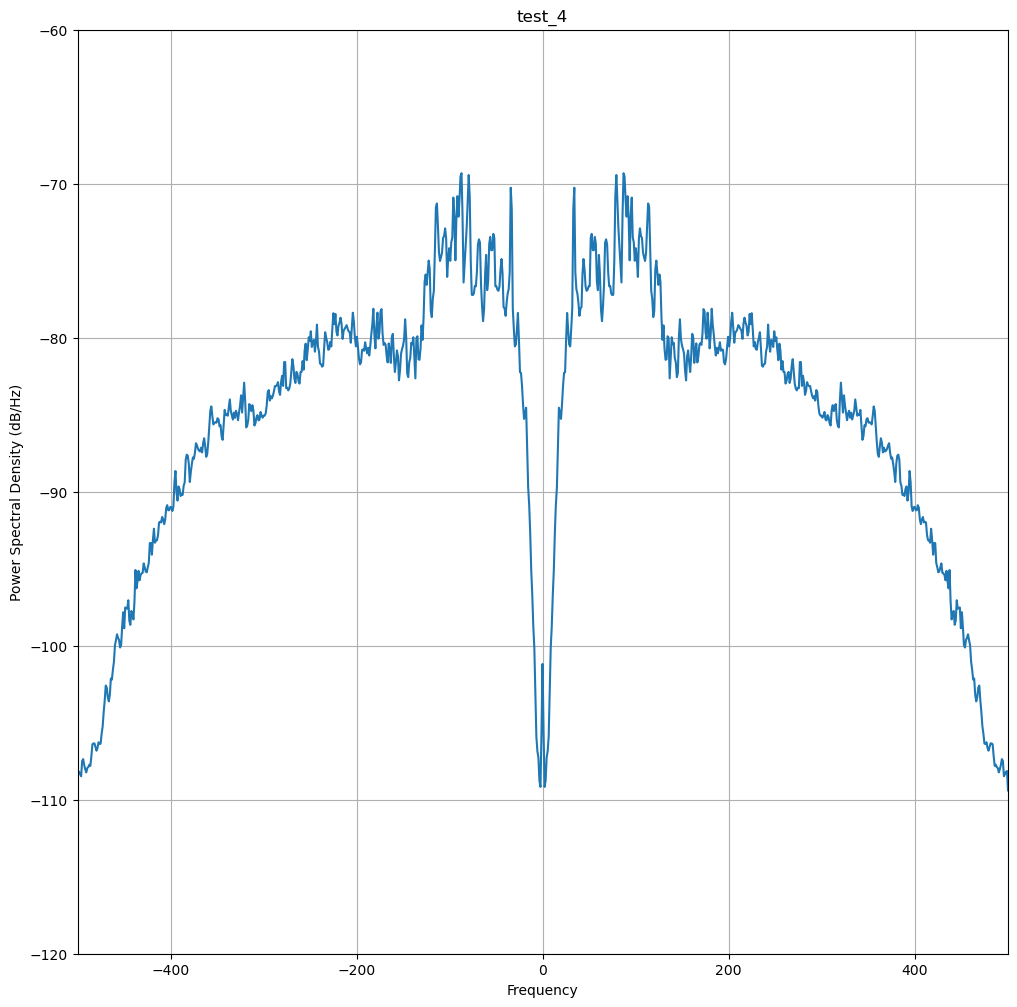

/tmp/ipykernel_12812/912104714.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


32421888 44100


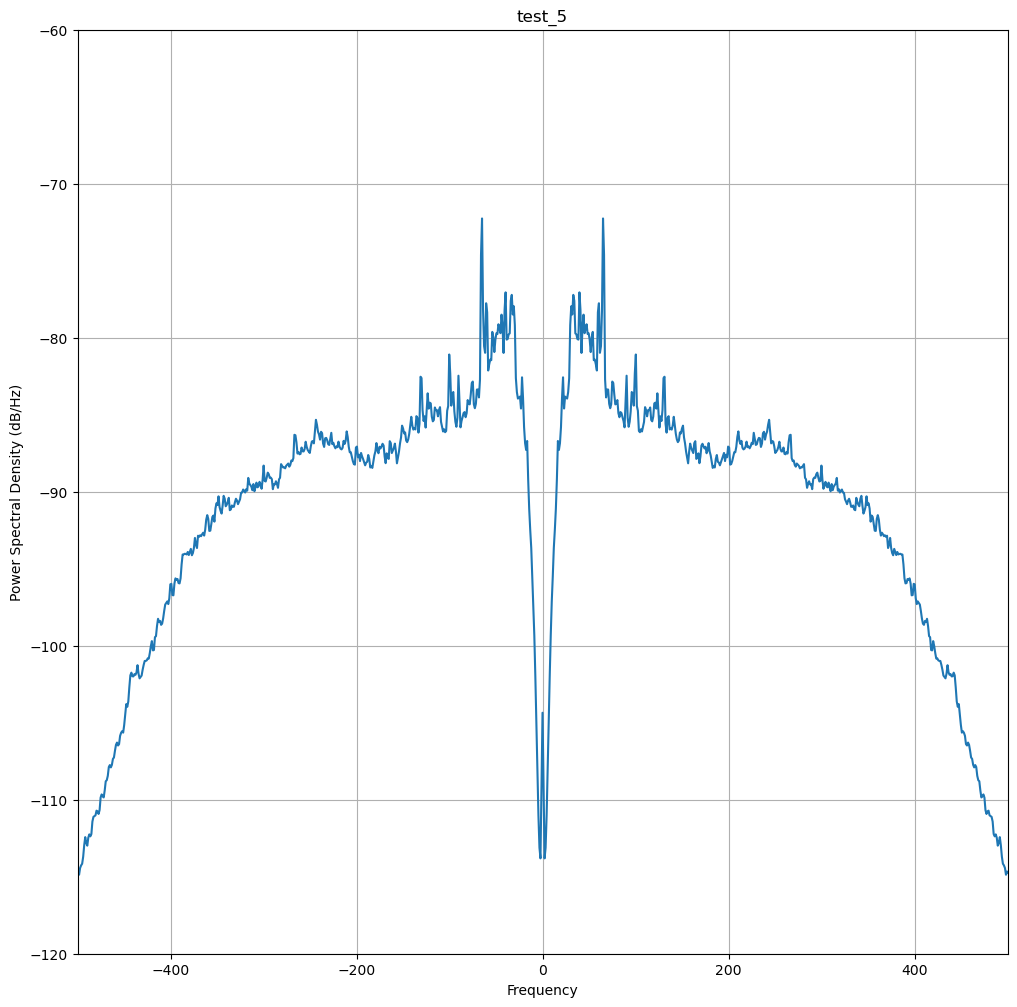

In [ ]:
import librosa
import glob
from scipy import signal
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the audio file
path = '../output/noise/'
if not os.path.exists(path):
    os.makedirs(path)
    print("Folder created")
else:
    print("Folder already exists")

for n in range(1,6):
    test_n = str(n)
    AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    samples = samples[ : 32421888]

    data = samples
    # data1 = dp.das_preprocess(data)
    nt = data.shape[0]

    window = signal.windows.tukey(nt, 0.2) #taping
    data2 = data * window[:]
    sos = signal.butter(6, 400, 'lp', fs=sample_rate, output='sos') # lowpass
    data2 = signal.sosfiltfilt(sos, data2)
    nfft = 40000 #psd 窗长度

    # data2 = dp.das_preprocess(data2)
    print(samples.size , sample_rate)

    N = samples.size
    #pdt
    x = data2
    
    fs = sample_rate
    plt.figure(figsize=(12,12))
    plt.axis([-500,500,-120,-60])
    plt.title("test_"+test_n)

    [Pxx1,f1] = plt.psd(x,                       # 随机信号
                    NFFT=nfft,               # 每个窗的长度
                    Fs=fs,                   # 采样频率
                    detrend='mean',          # 去掉均值
                    window=np.hanning(nfft), # 加汉尼窗
                    noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                    sides='twosided')        # 求双边谱

    plt.savefig(path+'/test'+test_n+'_noise_psdv2_lp400.png')
    plt.show()
    plt.close




In [ ]:
# #声波可视化：
# import librosa.display
# import matplotlib.pyplot as plt

# # x-axis has been converted to time using our sample rate. 
# # matplotlib plt.plot(y), would output the same figure, but with sample 
# # number on the x-axis instead of seconds
# plt.figure(figsize=(14, 5))
# plt.title("visualize the sound wave")
# librosa.display.waveshow(samples, sr=sample_rate , color="blue")


# # use the decibel scale 
# plt.figure(figsize=(14, 5))
# plt.title("use the decibel scale ")
# db_sgram = librosa.amplitude_to_db(samples, ref=np.min)
# librosa.display.waveshow(db_sgram, sr=sample_rate,color = "red")


# # use the power scale 
# plt.figure(figsize=(14, 5))
# plt.title("use the power scale ")
# power_s= (np.abs(samples))**2
# # print(samples[40:80], power_s[40:80])
# plt.plot(power_s)

# #声谱图
# plt.figure(figsize=(14, 5))
# plt.title("Spectrogram")
# sgram = librosa.stft(samples)
# librosa.display.specshow(sgram)


# # 使用梅尔刻度代替频率。
# # use the mel-scale instead of raw frequency
# plt.figure(figsize=(14, 5))
# plt.title("use the mel-scale instead of raw frequency")
# sgram_mag, _ = librosa.magphase(sgram)
# mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
# librosa.display.specshow(mel_scale_sgram)


# # use the decibel scale to get the final Mel Spectrogram
# plt.figure(figsize=(14, 5))
# plt.title("use the decibel scale to get the final Mel Spectrogram")
# mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
# librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')


# plt.figure(figsize=(14, 5))
# plt.title(" MFCC (Mel Frequency Cepstral Coefficients)")
# mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate,n_mfcc=20)
# librosa.display.specshow(mfcc, sr=sample_rate,  x_axis='time')

相对于绘制频率与时间的常规声谱图，梅尔声谱图有两个关键不同：

Y 轴为梅尔刻度而不是频率。
使用分贝刻度代替振幅来指示颜色。
深度学习模型通常使用梅尔声谱图而不是简单的声谱图。

我们修改上面的声谱图代码，使用梅尔刻度代替频率。

读取DAS计算出std之后的xls，并可视化，todo

In [ ]:
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import pandas as pd
# import glob
# # matplotlib.use('Agg')

# noise_df =pd.read_excel("../output/std.xls", skiprows=6 , sheet_name="std_per_0.2_s"  ,usecols=1)
# noise_df.plot(y='Recorded Value (dBA)', ax=plt.gca())
    
# plt.show()
    
# plt.grid()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

```2024 4 22```

确实看到了昼夜间的变化，这点很好。接下来有几点改进：1. 画psd不要做滤波，也不需要降采样。只需要考虑按照多长的时窗去分段做fft，然后所有时窗的频谱内每个频率的能量做平均。做fft可以用 np.fft.rfft，即实数序列的fft，省略了负半轴；2. 我们要重点关注das记录到的数据的时空变化，所以需要画一个从晚上8点到第二天早上8点的结果。把这个时间段的数据按照每小时来划分，每个小时内划分时窗后算psd。你需要考虑通道号880以前的通道，可以每隔10个通道算一个，一直到测试5附近的点位（这个需要从锤击试验获得）；3. 把这些结果先都算成数据存起来，然后我们考虑如何画图（比如时频图，横轴是小时，纵轴是频率；或者是频谱的空间分布，横轴是通道，纵轴是频谱的积分，即能量）

czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_120012.357  晚上八点

czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_000012.357  早上八点


画第二点的原因是想跟噪声测试的4和5对比，因为噪声4和5在不同的时间（凌晨2和3点），以及不同地点，看看das数据在4、5的这个两个时空不同的点上能不能对应，如果可以，那光纤的其他数据就是一个对环境噪声有效的连续、密集监测

音频数据的处理也要做分窗平均，尽量跟das处理方式接近,但比如说，das用了30s的时窗，有30*1000个数据点，那音频一个时窗就有30*44100个数据点
也就是在880通道拼出来一个时频psd图，我们看看能量如何随时间变化

现在的psd是没有降采样的，频段大概是-500～+500Hz，这是什么原因呢？那是因为das采样率是1kHz 所以Nyquist frequency是500Hz

In [ ]:
# %matplotlib ipympl
%matplotlib inline

path = '../output/test2_psd_v2/'

if not os.path.exists(path):
    os.makedirs(path)
    print("Folder created")
else:
    print("Folder already exists")

span_each_pic = 16
decimate_rate = 1
[Pxx0,f0] = [0,0]
for n in range(0,8):
    data , timestring , timeindex ,utc_day = skam(flist ,M=decimate_rate, start= test1_file_num + span_each_pic * n - 1,span= span_each_pic)
    data1 = dp.das_preprocess(data)
    data2 = dp.tapering(data1, 0.2)
    data2 = dp.lowpass(data2, 0.001, fh=400)
    data2 = dp.das_preprocess(data2)
    nfft = 500

    x = data2[60,:]
    fs = 1000
    plt.figure(figsize=(12,12))
    plt.axis([-600,600,-40,40])
    plt.title(str(utc_day)+" "+str(timestring[0])+" to "+str(timestring[-1]))

    [Pxx1,f1] = plt.psd(x,                       # 随机信号
                    NFFT=nfft,               # 每个窗的长度
                    Fs=fs,                   # 采样频率
                    detrend='mean',          # 去掉均值
                    window=np.hanning(nfft), # 加汉尼窗
                    noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                    sides='twosided')        # 求双边谱
    
    Pxx0 += Pxx1
    plt.savefig(path+'/Figure '+str(n+1)+'_ch880_lp400.png')
    plt.show()
    plt.close

    # plt.figure()
    # plt.plot(f1,Pxx0)
    # plt.yscale("log")
    # plt.show()
# plt.savefig(path+'/ch_880_psd_overlap.png')

In [ ]:
import librosa
import glob
from scipy import signal
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the audio file
path = '../output/noise/'
if not os.path.exists(path):
    os.makedirs(path)
    print("Folder created")
else:
    print("Folder already exists")

for n in range(1,6):
    test_n = str(n)
    AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    samples = samples[ : 32421888]

    data = samples
    # data1 = dp.das_preprocess(data)
    nt = data.shape[0]

    window = signal.windows.tukey(nt, 0.2) #taping
    data2 = data * window[:]
    sos = signal.butter(6, 400, 'lp', fs=sample_rate, output='sos') # lowpass
    data2 = signal.sosfiltfilt(sos, data2)
    nfft = 40000 #psd 窗长度

    # data2 = dp.das_preprocess(data2)
    print(samples.size , sample_rate)

    N = samples.size
    #pdt
    x = data2
    
    fs = sample_rate
    plt.figure(figsize=(12,12))
    plt.axis([-500,500,-120,-60])
    plt.title("test_"+test_n)

    [Pxx1,f1] = plt.psd(x,                       # 随机信号
                    NFFT=nfft,               # 每个窗的长度
                    Fs=fs,                   # 采样频率
                    detrend='mean',          # 去掉均值
                    window=np.hanning(nfft), # 加汉尼窗
                    noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                    sides='twosided')        # 求双边谱

    plt.savefig(path+'/test'+test_n+'_noise_psdv2_lp400.png')
    plt.show()
    plt.close




: 